# Homework 6
# Yue Shuai 

In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division

A simple data loading function.

In [2]:
### load data
def load_data(csvname):
    data = np.array(np.genfromtxt(csvname, delimiter=','))
    X = data[:,0:-1]
    y = data[:,-1]
    y = np.reshape(y,(np.size(y),1))
    return X,y

All of the functionality we need to create a gradient descent loop - including functions for computing cost function value, and the descent loop itself.

In [3]:
# YOUR CODE GOES HERE -- gradient descent for single layer tanh nn 
def gradient_descent(X,y,M):

    b = 0
    w = np.random.rand(M, 1) * 0.01
    c = np.zeros((M, 1))
    V = np.random.rand(M, 2) * 0.01
    P = np.size(y)
    alpha = 0.01
    l_p = np.ones((P, 1))
    max_its = 10000
    k = 1
    X = X.T
    for k in range(max_its):
        q = np.zeros((P,1))
        for p in np.arange(0,P):
            x = X[p].reshape(1,np.size(X[p]))
            q[p] = sigmoid(-y[p] * (b + np.dot(w.T, np.tanh(c + np.dot(V, x.T)))))
        grad_b = -1 * np.dot(l_p.T, q * y)
        grad_w = np.zeros((M, 1))
        grad_c = np.zeros((M, 1))
        grad_V = np.zeros((M, 2))
        for m in np.arange(0, M):
            _v = V[m]
            _v.shape = (2, 1)
            t = np.tanh(c[m] +np.dot(X,_v))
            s = 1 / np.cosh(c[m]+np.dot(X,_v))**2
            grad_w[m] = -1 * np.dot(l_p.T,q * t * y)
            grad_c[m] = -1 * np.dot(l_p.T,q * s * y) * w[m]
            grad_V[m] = (-1 * np.dot(X.T, q * s * y) * w[m]).reshape(2,)
        b = b - alpha * grad_b
        w = w - alpha * grad_w
        c = c - alpha * grad_c
        V = V - alpha * grad_V
        k = k + 1

    return b, w, c, V

Next our plotting functionality - both plotting points and nonlinear separator.

In [4]:
# plot points
def plot_points(X,y,ax):
    ind = np.nonzero(y==1)[0]
    ax.plot(X[ind,0],X[ind,1],'ro')
    ind = np.nonzero(y==-1)[0]
    ax.plot(X[ind,0],X[ind,1],'bo')
#     plt.hold(True)

# plot the seprator + surface
def plot_separator(b,w,c,V,X,y,ax):
    s = np.arange(-1,1,.01)
    s1, s2 = np.meshgrid(s,s)

    s1 = np.reshape(s1,(np.size(s1),1))
    s2 = np.reshape(s2,(np.size(s2),1))
    g = np.zeros((np.size(s1),1))

    t = np.zeros((2,1))
    for i in np.arange(0,np.size(s1)):
        t[0] = s1[i]
        t[1] = s2[i]
        F = compute_cost(c,V,t)
        g[i] = np.tanh(b + np.dot(F.T,w))

    s1 = np.reshape(s1,(np.size(s),np.size(s)))
    s2 = np.reshape(s2,(np.size(s),np.size(s)))
    g = np.reshape(g,(np.size(s),np.size(s)))
    # plot contour in original space
    ax.contour(s1,s2,g,1)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
#     plt.hold(True)

In [5]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [6]:
def compute_cost(c,V,t):
    F = np.tanh(c + np.dot(V,t))
    return F

With everything defined lets run all.

In [7]:
fig, ((ax2,ax3,ax4),(ax5,ax6,ax7)) = plt.subplots(2,3,figsize=(16,10))
axes=[ax2,ax3,ax4,ax5,ax6,ax7]

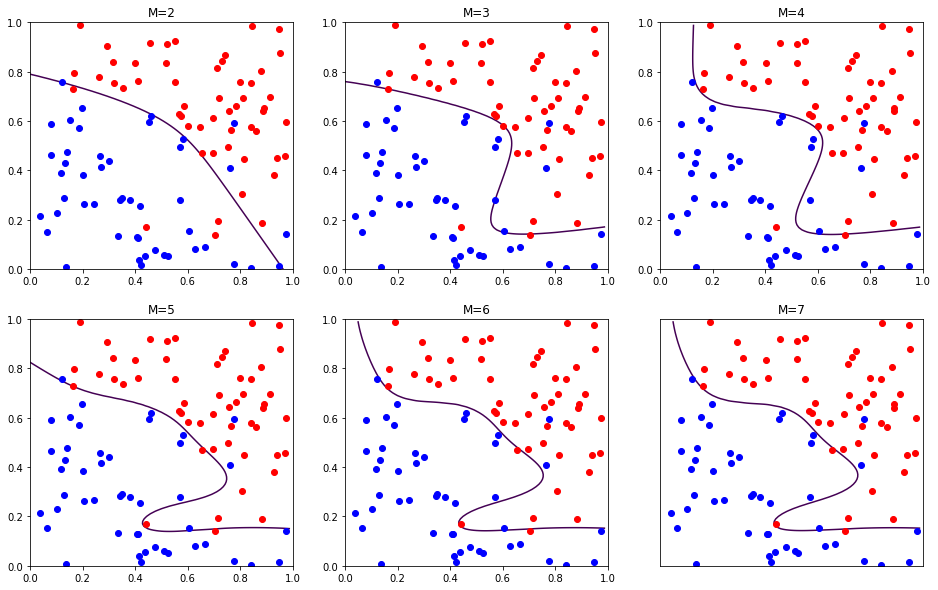

In [8]:
X, y = load_data('genreg_data.csv')
for M in range(2,8):
    b,w,c,V = gradient_descent(X.T,y,M)  
    ax_this=axes[M-2]
    plot_points(X,y,ax_this)
    plot_separator(b,w,c,V,X,y,ax_this)
    ax_this.set_title("M=%i"%M)
plt.show()

# 6_6

In [23]:
from __future__ import division
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pylab


# load data
def load_data():
    data = np.array(np.genfromtxt('knn_data.csv', delimiter=','))
    x = np.reshape(data[:, 0], (np.size(data[:, 0]), 1))
    y = np.reshape(data[:, 1], (np.size(data[:, 1]), 1))
    for i in np.arange(len(data)):
        if data[i][2] == 0:
            data[i][2] = -1
    return data, x, y

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

def knn(data, x, y, k):
    temp = np.zeros((len(data), 2))
    sum = 0
    for i in np.arange(len(data)):
        temp[i][0] = (x - data[i][0]) * (x - data[i][0]) + (y - data[i][1]) * (y - data[i][1])
        temp[i][1] = data[i][2]
    temp = temp.tolist()
    temp.sort(key=lambda x: x[0])
    temp = np.asarray(temp)
    for i in range(0, k):
        sum += temp[i][1]
    res = sign(sum)
    return res

data, x, y = load_data()
N = 10000
x1 = np.random.rand(N) * 10
y1 = np.random.rand(N) * 10


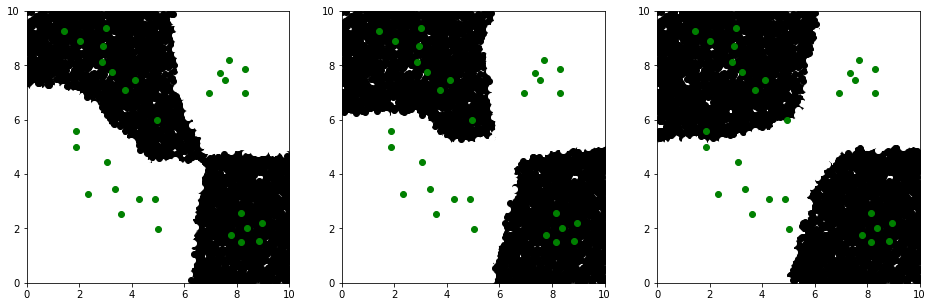

In [24]:
plt.clf()
fig,(ax1, ax5, ax10)= plt.subplots(1,3,figsize=(16,5))
axes = [ax1, ax5, ax10]
k=[1,5,10]


for z in range(3):
    for i in np.arange(len(x1)):
        #call the knn function and set the value of k equals (1, 5, 10)
        res = knn(data, x1[i], y1[i], k[z])
        if res >= 0:
            axes[z].scatter(x1[i], y1[i], color='black')
        else:
            axes[z].scatter(x1[i], y1[i], color='white')


    axes[z].plot(x, y, 'go')
    axes[z].set_xlim(0.0, 10.0)
    axes[z].set_ylim(0.0, 10.0)
plt.show()

# 6_9

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# cross validation parameters:
k = 3
# M = [2,5,9,14,20,27,35,44]
D = [1,2,3,4,5,6,7,8]

In [12]:
# load data
def load_data():
    data = np.array(np.genfromtxt('2eggs_data.csv', delimiter=','))
    data = np.random.permutation(data)
    return data
data = load_data()

In [13]:
def train_test_split(data, D, k):
    
    extra = data.shape[0] % k
    data_k=np.split(data[extra:], k)
    
    data_test = data_k[D]
    test_x = data_test[:,:-1]
    test_y = data_test[:,-1:]
    test_l = data_test[:,]
    
    part=int((data.shape[0]-extra)/k)
    
    data_train = np.delete(data, range(D*part,(D+1)*part), axis=0)
    
    train_x = data_train[:,:-1]
    train_y = data_train[:,-1:]
                
    return train_x, train_y, test_x, test_y

In [14]:
def sign_np(x):
    x[x>=0] = 1
    x[x<0] =-1
    return x

def compare(x):
    x[x<0]=0
    return x

def polynomial_features(x, order):
    x = np.asarray(x).T[np.newaxis]
    n = x.shape[1]
    power_matrix = np.tile(np.arange(order + 1), (n, 1)).T[..., np.newaxis]
    X = np.power(x, power_matrix)
    I = np.indices((order + 1, ) * n).reshape((n, (order + 1) ** n)).T
    F = np.product(np.diagonal(X[I], 0, 1, 2), axis=2)
    return F

In [15]:
# plot mse's over all D tested 
def plot_mse(train_mses, test_mses, deg):
    plt.plot(np.arange(1,np.size(train_mses)+1),train_mses,'ro--', color = 'yellow', label = 'train_error')
    plt.plot(np.arange(1,np.size(test_mses)+1),test_mses,'ro--', color = 'blue', label = 'test_error')
    plt.title('Error on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('Error       ', fontsize=18)
    plt.legend()

In [16]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(data, deg_range, k):
    # generate nonlinear features
    train_mses, test_mses = [], []
    for D in np.arange(0,np.size(deg_range)):
        train_MSE = 0
        test_MSE = 0
        for i in range(k):

            train_x, train_y, test_x, test_y = train_test_split(data, i, k)

            F = polynomial_features(train_x, M[D])
            w = np.dot(np.linalg.pinv(np.dot(F, F.T)), np.dot(F,train_y))            

            train_MSE += np.mean(compare(sign_np(-train_y*np.dot(F.T,w))))
    
            F = polynomial_features(test_x, M[D])
            test_MSE += np.mean(compare(sign_np(-test_y*np.dot(F.T,w))))

        train_mses.append(train_MSE)
        test_mses.append(test_MSE)

    fig = plt.figure(figsize = (7,7))
    plot_mse(train_mses, test_mses,deg_range)
    plt.show()

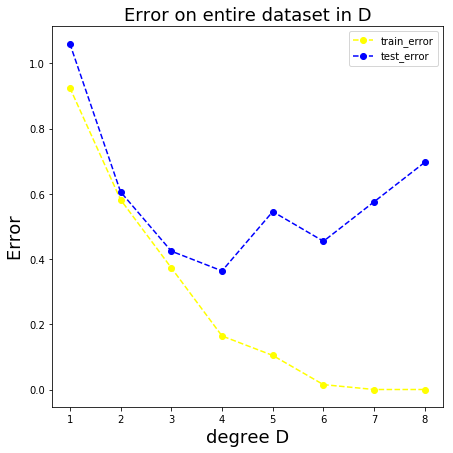

In [17]:
plt.clf()
try_all_degs(data, M, k)